In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_excel("C:\\Users\\User\\OneDrive\\Desktop\\netflix_titles.xlsx")

In [129]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [130]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [131]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [132]:
both_missing = df[df["director"].isnull() & df["cast"].isnull()]

num_both_missing = both_missing.shape[0]

print(f"Number of rows where both 'director' and 'cast' are missing: {num_both_missing}")

Number of rows where both 'director' and 'cast' are missing: 214


In [133]:
df = df[~(df["director"].isnull() & df["cast"].isnull())]

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

print("Rows with both 'director' and 'cast' missing have been removed.")

Rows with both 'director' and 'cast' missing have been removed.


In [134]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6015,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6016,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6017,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6018,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [135]:
df = df.dropna(subset=["date_added", "rating"])

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

print("Rows with missing 'date_added' or 'rating' have been removed.")

Rows with missing 'date_added' or 'rating' have been removed.


In [136]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1742
cast             354
country          429
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [137]:
df.fillna("Other", inplace=True)

print("All remaining missing values have been filled with 'Other'.")

All remaining missing values have been filled with 'Other'.


C:\Users\User\AppData\Local\Temp\ipykernel_14856\1520701745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("Other", inplace=True)


In [138]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

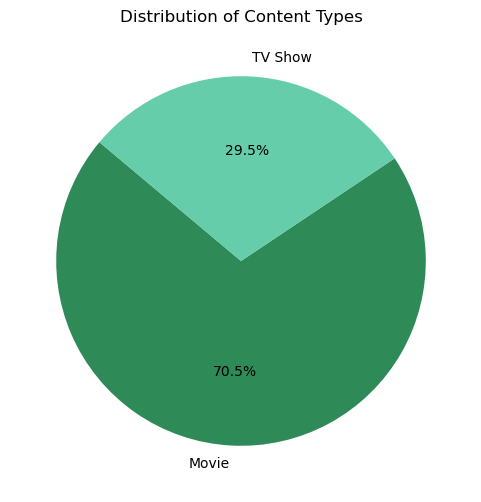

In [139]:
# Count occurrences of each type
type_counts = df["type"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
colors = ["#2E8B57", "#66CDAA"]  # Using a green color palette
type_counts.plot.pie(autopct="%1.1f%%", colors=colors, startangle=140)

# Add title
plt.title("Distribution of Content Types")

# Show the plot
plt.ylabel("")  # Hide the y-label for a cleaner look
plt.show()

In [140]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

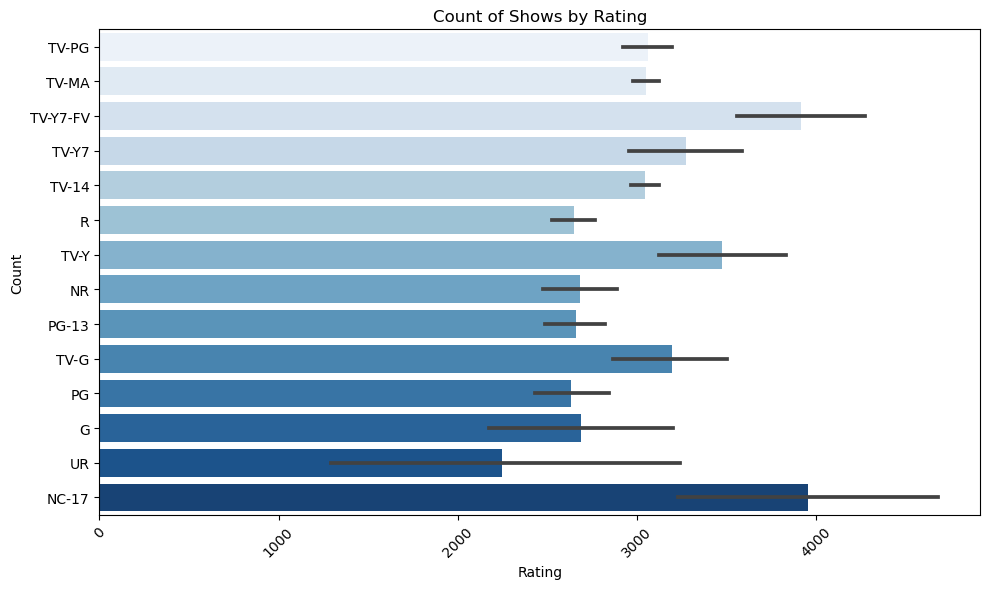

In [141]:

plt.figure(figsize=(10, 6))
sns.barplot(x=df['rating'].index, y=df['rating'].values, palette='Blues')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Shows by Rating')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show the bar chart
plt.tight_layout()
plt.show()

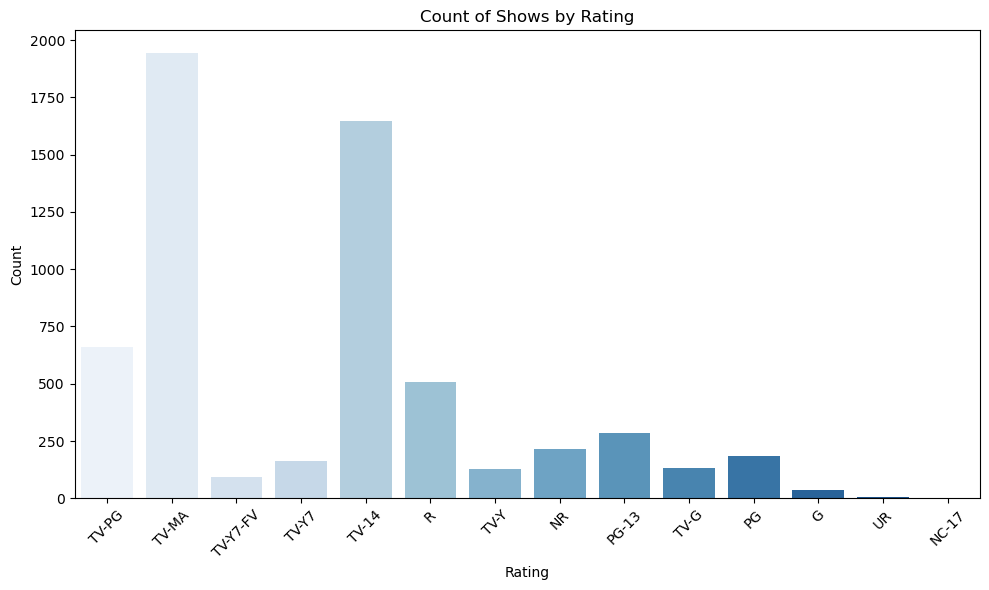

In [142]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='Blues')
plt.title('Count of Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

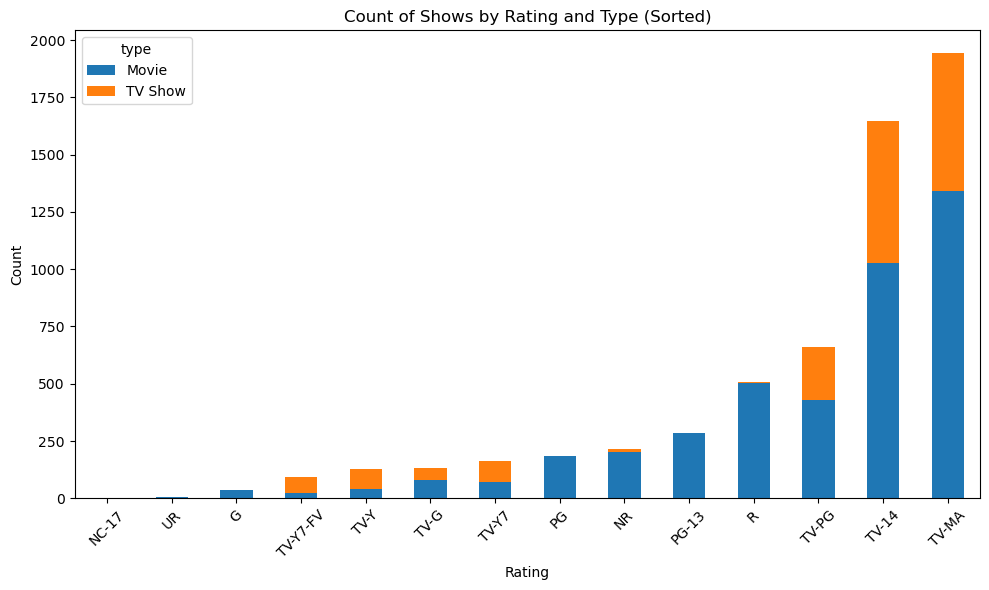

In [90]:
rating_type_counts = df.groupby(['rating', 'type']).size().unstack(fill_value=0)

# Step 2: Sort the DataFrame by the total counts for each rating (sum across rows)
sorted_rating_type_counts = rating_type_counts.loc[rating_type_counts.sum(axis=1).sort_values(ascending=True).index]

# Step 3: Plot the stacked bar chart
sorted_rating_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Count of Shows by Rating and Type (Sorted)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

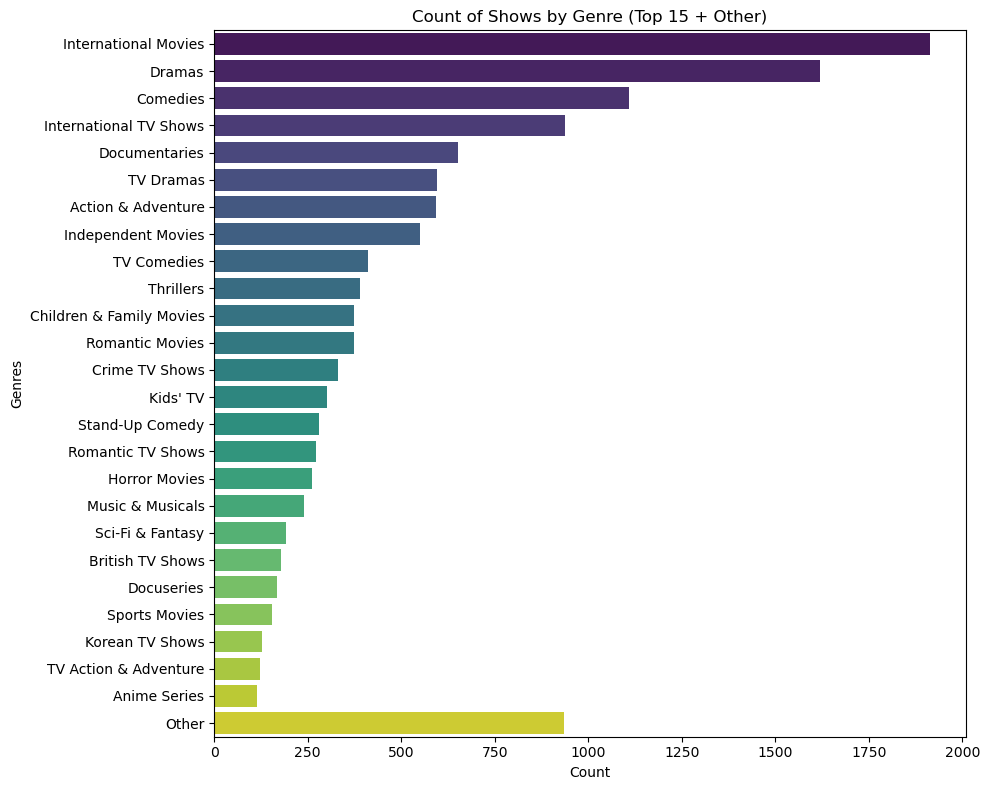

In [98]:
# Step 1: Count the occurrences of each unique genre
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()

# Step 2: Get the top 15 genres
top_genres = genre_counts.nlargest(25)

# Step 3: Combine the remaining genres into "Other"
other_count = genre_counts[~genre_counts.index.isin(top_genres.index)].sum()

# Use pd.concat to add the "Other" category
top_genres = pd.concat([top_genres, pd.Series({'Other': other_count})])

# Step 4: Set up the horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')

# Step 5: Add labels and title
plt.ylabel('Genres')
plt.xlabel('Count')
plt.title('Count of Shows by Genre (Top 15 + Other)')

# Show the horizontal bar chart
plt.tight_layout()
plt.show()


In [99]:
df.listed_in.unique()

array(['Children & Family Movies, Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Comedies',
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Children & Family Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Documentaries', 'Horror Movies, Thrillers',
       'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, Independent Movies, International Movies',
      

In [143]:
# Define the complete mapping of genres to categories
genre_mapping = {
    "Action & Adventure": [
        "Action & Adventure",
        "Action & Adventure, Thrillers",
        "Action & Adventure, Dramas",
        "Action & Adventure, Comedies",
        "Action & Adventure, International Movies",
        "Action & Adventure, Sci-Fi & Fantasy",
        "Action & Adventure, Romantic Movies",
        "Action & Adventure, Anime Features",
        "Action & Adventure, Horror Movies",
        "Action & Adventure, Independent Movies",
        "Action & Adventure, Music & Musicals",
        "Action & Adventure, Documentaries",
        "Action & Adventure, Cult Movies",
        "Action & Adventure, Faith & Spirituality"
    ],
    "Comedy": [
        "Comedies",
        "Stand-Up Comedy",
        "TV Comedies",
        "Stand-Up Comedy & Talk Shows",
        "Comedies, Dramas",
        "Comedies, Independent Movies",
        "Comedies, Romantic Movies",
        "Comedies, Horror Movies",
        "Comedies, Sci-Fi & Fantasy",
        "Comedies, Music & Musicals",
        "Comedies, Thrillers",
        "Comedies, International Movies",
        "Comedies, Action & Adventure",
        "Comedies, Faith & Spirituality"
    ],
    "Drama": [
        "Dramas",
        "TV Dramas",
        "Dramas, Independent Movies",
        "Dramas, Romantic Movies",
        "Dramas, Sci-Fi & Fantasy",
        "Dramas, Faith & Spirituality",
        "Dramas, International Movies",
        "Dramas, Sports Movies",
        "Dramas, Horror Movies"
    ],
    "Horror & Thrillers": [
        "Horror Movies",
        "Horror Movies, Thrillers",
        "TV Horror",
        "TV Thrillers",
        "Horror Movies, Independent Movies",
        "Horror Movies, Sci-Fi & Fantasy",
        "Horror Movies, International Movies",
        "Horror Movies, Cult Movies"
    ],
    "Documentary & Docuseries": [
        "Documentaries",
        "Docuseries",
        "Documentaries, International Movies",
        "Documentaries, Music & Musicals",
        "Documentaries, Sports Movies",
        "Documentaries, Faith & Spirituality"
    ],
    "International": [
        "International Movies",
        "International TV Shows",
        "Spanish-Language TV Shows",
        "Korean TV Shows",
        "British TV Shows",
        "International TV Shows, Spanish-Language TV Shows, TV Dramas",
        "International TV Shows, Reality TV",
        "Crime TV Shows, International TV Shows",
        "International Movies, Sci-Fi & Fantasy"
    ],
    "Kids & Family": [
        "Children & Family Movies",
        "Kids' TV",
        "Children & Family Movies, Dramas",
        "Children & Family Movies, Comedies",
        "Children & Family Movies, Music & Musicals",
        "Children & Family Movies, Sci-Fi & Fantasy"
    ],
    "Anime & Animation": [
        "Anime Series",
        "Anime Features",
        "Anime Series, International TV Shows",
        "Anime Series, Kids' TV",
        "Anime Series, Teen TV Shows",
        "Anime Series, Crime TV Shows"
    ],
    "Sci-Fi & Fantasy": [
        "Sci-Fi & Fantasy",
        "TV Sci-Fi & Fantasy",
        "Sci-Fi & Fantasy, Thrillers",
        "Sci-Fi & Fantasy, International Movies"
    ],
    "Crime & Mystery": [
        "Crime TV Shows",
        "TV Mysteries",
        "Crime TV Shows, Spanish-Language TV Shows, TV Dramas",
        "Crime TV Shows, International TV Shows"
    ],
    "Romance": [
        "Romantic Movies",
        "Romantic TV Shows",
        "Comedies, Romantic Movies",
        "Dramas, Romantic Movies"
    ],
    "Cult, Classic & Independent": [
        "Cult Movies",
        "Classic Movies",
        "Independent Movies",
        "Classic Movies, Dramas, Independent Movies",
        "Classic Movies, Comedies, Cult Movies"
    ],
    "Reality & Unscripted": [
        "Reality TV",
        "Documentaries, Reality TV"
    ],
    "Music, Musicals & Sports": [
        "Music & Musicals",
        "Sports Movies",
        "Documentaries, Sports Movies"
    ],
    "Faith, Spirituality & LGBTQ": [
        "Faith & Spirituality",
        "LGBTQ Movies",
        "Dramas, Faith & Spirituality, International Movies"
    ]
}

# Create a reverse mapping for easy lookup
genre_to_category = {genre: category for category, genres in genre_mapping.items() for genre in genres}

# Map the genres based on the 'listed_in' column and create the new 'genres' column
df['genres'] = df['listed_in'].map(lambda x: genre_to_category.get(x, 'Unknown'))

# Display the updated DataFrame
print(df)


       show_id     type                                    title  \
0     81145628    Movie  Norm of the North: King Sized Adventure   
1     80117401    Movie               Jandino: Whatever it Takes   
2     70234439  TV Show                       Transformers Prime   
3     80058654  TV Show         Transformers: Robots in Disguise   
4     80125979    Movie                             #realityhigh   
...        ...      ...                                      ...   
5996  80162994  TV Show                  Talking Tom and Friends   
5997  80186475  TV Show                      PokÃ©mon the Series   
5998  70272742  TV Show                              Justin Time   
5999  80067942  TV Show  Terrace House: Boys & Girls in the City   
6000  70136122  TV Show                                    Weeds   

                      director  \
0     Richard Finn, Tim Maltby   
1                        Other   
2                        Other   
3                        Other   
4            

C:\Users\User\AppData\Local\Temp\ipykernel_14856\1843449793.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['listed_in'].map(lambda x: genre_to_category.get(x, 'Unknown'))


In [148]:
df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Kids & Family
1,80117401,Movie,Jandino: Whatever it Takes,Other,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Comedy
2,70234439,TV Show,Transformers Prime,Other,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",Kids & Family
3,80058654,TV Show,Transformers: Robots in Disguise,Other,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,Kids & Family
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Comedy
5,80163890,TV Show,Apaches,Other,"Alberto Ammann, Eloy AzorÃ­n, VerÃ³nica Echegu...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,Unknown
6,70304989,Movie,Automata,Gabe IbÃ¡Ã±ez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",Unknown
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,Comedy
8,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,Action & Adventure
9,80169755,Movie,JoaquÃ­n Reyes: Una y no mÃ¡s,JosÃ© Miguel Contreras,JoaquÃ­n Reyes,Other,"September 8, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator JoaquÃ­n R...,Comedy


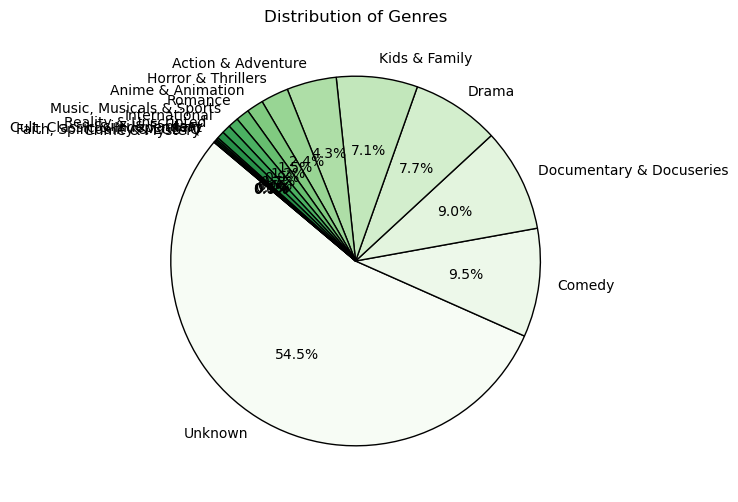

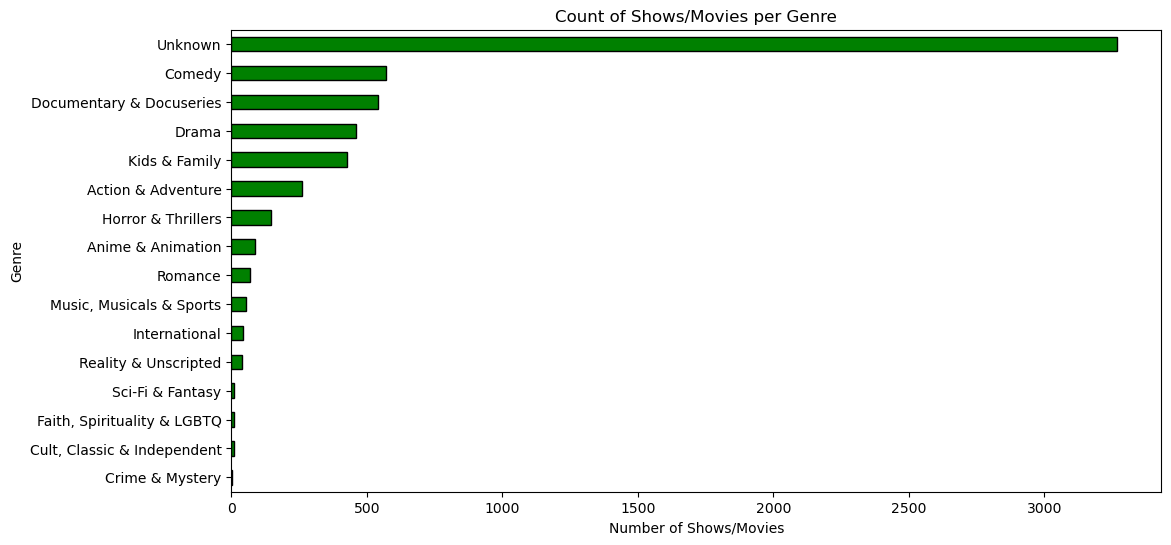

In [152]:
genre_counts = df['genres'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
genre_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Greens', wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Genres")
plt.ylabel('')  # Hide y-label
plt.show()

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
genre_counts.sort_values().plot(kind='barh', color='green', edgecolor='black')
plt.xlabel("Number of Shows/Movies")
plt.ylabel("Genre")
plt.title("Count of Shows/Movies per Genre")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14856\2817839728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_group'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=True)


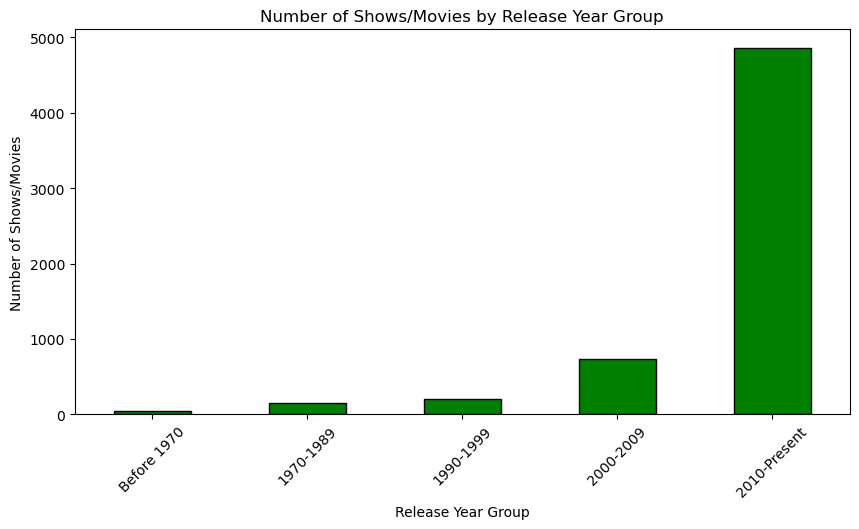

In [154]:
bins = [df['release_year'].min(), 1970, 1990, 2000, 2010, df['release_year'].max()]
labels = ["Before 1970", "1970-1989", "1990-1999", "2000-2009", "2010-Present"]

# Create a new column with the binned categories
df['year_group'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=True)

# Count occurrences per bin
year_group_counts = df['year_group'].value_counts().reindex(labels)

# Plot the bar chart
plt.figure(figsize=(10, 5))
year_group_counts.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel("Release Year Group")
plt.ylabel("Number of Shows/Movies")
plt.title("Number of Shows/Movies by Release Year Group")
plt.xticks(rotation=45)
plt.show()